# Titanic Exploratory Data Analysis

 References:
 
 http://www.history.com/this-day-in-history/titanic-sinks
 
 https://en.wikipedia.org/wiki/Lifeboats_of_the_RMS_Titanic

# 1 Introduction

<p align="justify">The RMS Titanic, one of the largest and most luxurious ocean liners ever built from its time. Spanning about 883 feet from stern to bow, a height of 175 feet, and a massive weight of 46,000 tons, it was made to carry about 3,500 passengers and crew. With its massive build, the ship was thought to be unsinkable. However on April 14, 1912 just before midnight, the ship failed to divert its course from an iceberg, which left at least 5 of its hull compartments ruptured. Due to the shortage of lifeboats, only about 700 passengers survived out of the approximately 2,224 passengers on board. 
</p>

<p align="justify">
This exploratory data analysis is submitted as partial fullfilment of the requirements for Udacity's Data Analyst Nanodegree Program. In this notebook, I shall be going into the step by step process of data analysis, in order to answer some questions regarding the given data. The data to be used in this notebook was provided by Udacity and the description of variables was obtained from Kaggle.
</p>


## 1.1 Data Wrangling

### Imports and Loading the Data 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
%matplotlib inline
fig_prefix = '../figures/2015-09-20-as-titanic-explo-lab-'

plt.rcParams['font.size'] = 14.0   

In [2]:
# Getting the titanic data
titanic_df = pd.read_csv('../data/titanic_data.csv')

### Some information about the data

In [3]:
# Some information about the data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


>**Note: **From here we can see that there are about **891 entries** with a total of **12 columns**. The data types for each column can be observed as well. The variable descriptions as obtained from Kaggle is showed from this text file *[data_descriptions.txt](../data/data_descriptions.txt)*.

In [4]:
# Looking at some entries of the data
titanic_df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


## 1.2 Data Cleaning
Looking at the the data under the `Pclass`, `Sex`, and `Embarked` columns, the values didn't represent well their meaning. And since, I'm going to use the data in visualizing some of the analysis, it is much better to change them here.

### Cleaning the `Pclass`, `Sex`, and `Embarked` Columns
For the `Pclass` column, I would put the respective socio-economic status value for each numeric value. *(1= Upper Class, 2 = Middle Class, 3 = Lower Class)*. Meanwhile, for the `Sex` column, I would just capitalize each word of the gender. And finally, for the `Embarked` column, I would put the respective embark locations *(C = Cherbourg; Q = Queenstown; S = Southampton)*.

In [5]:
# Functions to clean data
def clean_pclass(df_col):
    '''Returns the string counterpart of the Pclass'''
    p_class = ["Upper Class", "Middle Class", "Lower Class"]
    return p_class[df_col-1]

def clean_embark(df_col):
    '''Returns the whole name of embarked location'''
    if df_col=='C':
        return 'Cherbourg'
    elif df_col=='Q':
        return 'Queenstown'
    else:
        return 'Southampton'
    
def clean_data(df):
    '''Returns the cleaned data frame'''
    df['Pclass'] = df['Pclass'].apply(clean_pclass)
    df['Sex'] = df['Sex'].apply(str.title)
    df['Embarked'] = df['Embarked'].apply(clean_embark)
    return df

In [6]:
titanic_df = clean_data(titanic_df)

In [7]:
# Looking at the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Lower Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,Lower Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,Lower Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton


> **Note: **We can see that the changes have reflected in the data frame but the `Age` and `Cabin` column still have some missing values.

### Counting the NaN Entries by Column
Upon looking at the data, I observed that some rows have no entries under the Age and Cabin column. Is there other columns with missing values? In order to explore the data even further, I looked at each column and check the number of NaN entries in that column.

In [8]:
# Counts the number of NaN or null entries in each column
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

> **Note: **It can be seen that only the `Age` and `Cabin` column have missing values.

### Filling the Missing Values

Remember that the `Age` and `Cabin` columns have some `NaN` or missing values in some of its rows. Upon reading some online resources, I found out that there are options on how to deal with these rows. 

First option is by dropping the rows that have no entries under the `Age` and `Cabin` column, but after observing that a large number of rows have no entries under the respective columns, it would greatly affect my dataset if I were to drop these rows. Hence my second option, using some information from rows with values under the `Age` and `Cabin` columns, I would predict the missing values of these columns.

In filling up the missing age, I could have gotten the median age by sex, and just subtitute this median age for every missing value based on the sex of that row. But, I have observed from the data that the title of names (i.e. Mr, Ms, Master, etc.) could also have something to do with age, especially that the title `Master` seemed to be associated with children. Hence, I decided to use these title, in order to predict or fill the missing age.

### Splitting the `Name` Column
Using the `Name` column of the data frame, I would split the passenger's name and add three additional columns: `Title`, `Firstname`, `Surname` for the name's title, first name, and surname, respectively.

In [9]:
# Splitting the surname from the rest of the name
s_surname = titanic_df['Name'].str.split(',', expand=True)

# Splitting the title from the rest of the name
s_title = s_surname[1].str.split('.', expand=True)

# Putting the name sections in series
s_firstname = s_title[1].str.strip()
s_title = s_title[0].str.strip()
s_surname = s_surname[0]

# # Editing the column name
s_firstname = s_firstname.rename('Firstname')
s_title = s_title.rename('Title')
s_surname = s_surname.rename('Surname')

In [10]:
# Adding the name sections to the data frame
titanic_df = titanic_df.join([s_title, s_firstname, s_surname])

### Organizing the `Title` Column

Now that the additional columns have been added, I then would like to look at the different titles that I would be working with. Upon looking at the different titles, I decided to unify some of the titles in order to fill the missing ages according to the passenger's title.

In [11]:
# Looking at the different titles in the Data
titanic_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [12]:
# Looking at the different titles with missing ages
titanic_df[titanic_df['Age'].isnull()]['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Dr'], dtype=object)

In [13]:
# Function that would unify or organize the title based on the titles with missing ages
def unify_title(df):
    '''
    Returns the respective title
    '''
    if df in ['Don', 'Rev', 'Major', 'Sir', 'Col', 'Capt', 'Jonkheer', 'Mr']:
        return 'Mr'
    elif df in ['Lady', 'the Countess', 'Mrs']:
        return 'Mrs'
    elif df in ['Mme', 'Mlle', 'Ms', 'Miss']:
        return 'Miss'
    else:
        return df

In [14]:
titanic_df['UniTitle'] = titanic_df['Title'].apply(unify_title)

In [34]:
# Confirming that the columns have been added
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Firstname,Surname,UniTitle,Filled Age
0,1,0,Lower Class,"Braund, Mr. Owen Harris",Male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr,Owen Harris,Braund,Mr,22.0
1,2,1,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs,John Bradley (Florence Briggs Thayer),Cumings,Mrs,38.0
2,3,1,Lower Class,"Heikkinen, Miss. Laina",Female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss,Laina,Heikkinen,Miss,26.0
3,4,1,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs,Jacques Heath (Lily May Peel),Futrelle,Mrs,35.0
4,5,0,Lower Class,"Allen, Mr. William Henry",Male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr,William Henry,Allen,Mr,35.0


### Filling the Missing Ages

In filling up the missing ages, I wouldn't want to modify the original data, hence I would make a new column `Filled Age` that would contain all passenger's age. Also, since the mean is greatly affected by outliers in the data set, I created a boxplot of `Ages` by `Title`, in order to see the presence of outliers.

#### Looking for outliers in the Age of each Unified Title

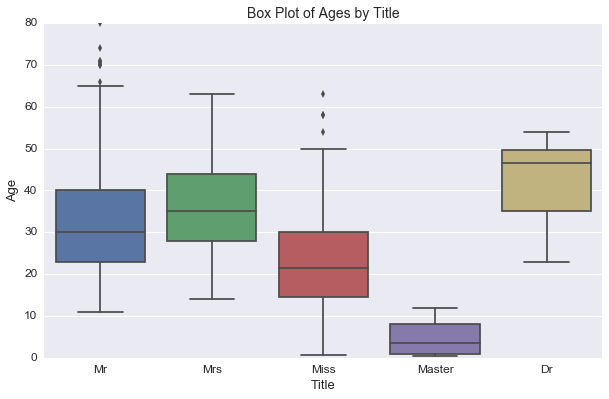

In [16]:
# Plotting the box plot per Unititle
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.boxplot(x='UniTitle', y='Age', data=titanic_df)

# Plot Customizations
ax.tick_params(labelsize=12)
ax.set_xlabel('Title', fontsize=13)
ax.set_ylabel('Age', fontsize=13)
ax.set_title('Box Plot of Ages by Title', fontsize=14)

fig.savefig(fig_prefix+'box_plot_ages_by_title')

> **Note: **Since there are some outliers, the mean `Age` for the `Titles`: `Mr` and `Miss`, would be affected. Hence, I decided to use the median instead.

#### Creating and filling the `Filled Age` column

In [17]:
# Creating a series that contains the median age for each title
median_age_by_title = titanic_df.groupby('UniTitle').median().round(2)['Age']
median_age_by_title

UniTitle
Dr        46.5
Master     3.5
Miss      21.5
Mr        30.0
Mrs       35.0
Name: Age, dtype: float64

In [18]:
# Creating the new column that would contain the complete age data
titanic_df['Filled Age'] = titanic_df['Age']   

# Filling the missing ages
for i in range(len(titanic_df)):
    if np.isnan(titanic_df.loc[i, 'Filled Age']):
        titanic_df.loc[i, 'Filled Age'] = median_age_by_title.loc[titanic_df.loc[i, 'UniTitle']]

In [19]:
# Looking at the new data frame
titanic_df[titanic_df['Age'].isnull()][['Age', 'UniTitle', 'Filled Age']].head()

,Age,UniTitle,Filled Age
5,NaN,Mr,30.0
17,NaN,Mr,30.0
19,NaN,Mrs,35.0
26,NaN,Mr,30.0
28,NaN,Miss,21.5


> **Note: ** We could see that for every NaN values, we have successfully filled it based on the person's title

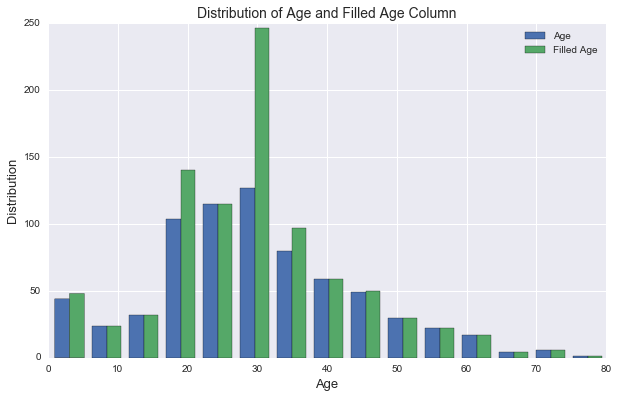

In [20]:
# Visualizing the two distributions
fig = plt.figure(figsize=(10,6))

# Plotting the Histogram of Age (where we drop the NA rows), and Filled Age
plt.hist([titanic_df['Age'].dropna(), titanic_df['Filled Age']], label=['Age','Filled Age'], bins=15)

# Plot Customizations
plt.legend(loc='best')
plt.xlabel('Age', fontsize=13)
plt.ylabel('Distribution', fontsize=13)
plt.title('Distribution of Age and Filled Age Column', fontsize=14)

plt.savefig(fig_prefix+'distribution_age_and_fill_age')

>**Note: **Looking at this figure, it seemed that the difference between the `Age` and `Filled Age` column can be seen at the age bin of around 30. Did most of the `NaN` or null values dropped have `UniTitle` of `Mr`? Specifically, is most of the missing `Age` values are Male?

### Another look into the missing `Age` values

In [21]:
# Missing Age Values by Gender
print (titanic_df[titanic_df['Age'].isnull()]['Sex']=='Male').sum()   # Number of missing age values from male
print (titanic_df[titanic_df['Age'].isnull()]['Sex']=='Female').sum() # Number of missing age values from female

124
53


> **Note: **From this, we could see that a large portion of the missing `Age` values are indeed Male, and since the `Title Mr` have been given to the majority of Male passengers, it is understandable that there would be a huge difference at the age bin of 30, which is the median age of `UniTitle Mr`.

### Filling-up the `Cabin` Column

The `Cabin` column seemed to be missing a lot of values. To be specific, 687 rows have no values under the `Cabin` column. Since there are only about 891 entries in the data frame, almost 77% of the values under the `Cabin` column is missing. Hence, I have decided not to fill this column, and proceed with the analysis part of the data.

# 2 Analysis

In this part, I would go further into the analysis of factors that could have affected a person's survivability in the Titanic incident.

## 1.3 Data Exploration

To start with the exploration, I am going to start off with the basic details that the data has to offer.

### How many female passengers and male passengers survived?

In [22]:
grouped_by_sex_survival = pd.DataFrame(titanic_df.groupby(['Sex', 'Survived'], as_index=True).count()['PassengerId'])
grouped_by_sex_survival.columns = ['Count']
grouped_by_sex_survival.index.set_levels(['Not Survived', 'Survived'], level=1, inplace=True)
grouped_by_sex_survival

Count
Sex    Survived           
Female Not Survived     81
       Survived        233
Male   Not Survived    468
       Survived        109

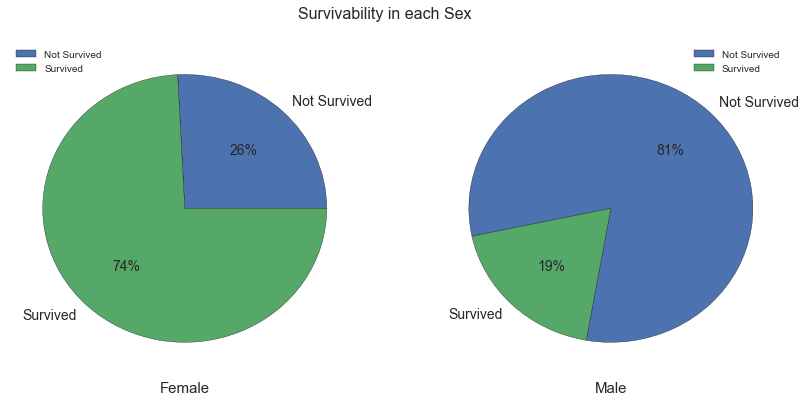

In [23]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Plotting
grouped_by_sex_survival.ix['Female'].plot.pie(subplots=True, fontsize=14, ax=ax1, autopct='%.0f%%')
grouped_by_sex_survival.ix['Male'].plot.pie(subplots=True, fontsize=14, ax=ax2, autopct='%.0f%%', startangle=-100)

# Plot Customization
fig.suptitle('Survivability in each Sex', fontsize=16)
ax1.set_xlabel('Female', fontsize=15)
ax1.yaxis.set_visible(False)
ax2.set_xlabel('Male', fontsize=15)
ax2.yaxis.set_visible(False)

fig.savefig(fig_prefix+'pie_survival_each_gender')

## 2.1 Data Visualization

In [24]:
def plot_customize(ax, title, xlabel, ylabel):
    ax.tick_params(labelsize=12)
    ax.set_xlabel(xlabel, fontsize=13)
    ax.set_ylabel(ylabel, fontsize=13)
    ax.set_title(title, fontsize=14)
    
    return ax

### Survivability by Sex
As per reports, most of the 700 survivors of Titanic are female, and children. I wanted to confirm this by looking into visualizations of the data.

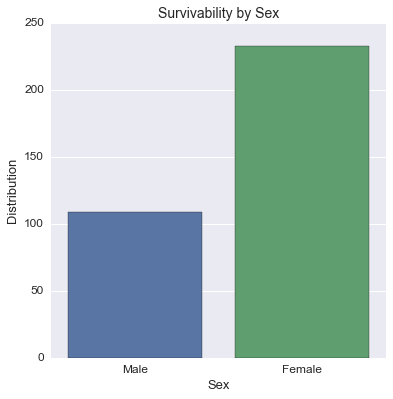

In [25]:
# Looking into survivability by sex
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Sex', y='Survived', data=titanic_df, estimator=np.sum, ci=0)

# Plot Customizations
plot_customize(ax, 'Survivability by Sex', 'Sex', 'Distribution', )
fig.savefig(fig_prefix+'survivability_by_sex')

> **Note: ** From the figure above, we could see that most of the survivors are indeed female.

### Survivability by Class
Looking at a passenger's socio-economic status and survivability.

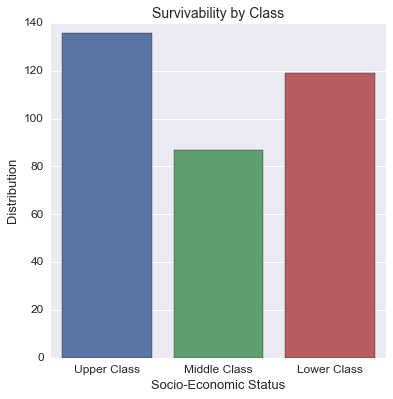

In [26]:
# Looking into survivability by Class
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Pclass', y='Survived', data=titanic_df, estimator=np.sum, ci=0,
                 order=['Upper Class', 'Middle Class', 'Lower Class'])

# Plot Customizations
plot_customize(ax, 'Survivability by Class', 'Socio-Economic Status', 'Distribution')
fig.savefig(fig_prefix+'survivability_by_class')

> **Note: ** From here, we could see that the socio-economic status may also have played a role in a passenger's survivability.

### Survivability by Sex in each Class
Using the two graphs before, let's look at the survivability by gender in each class.

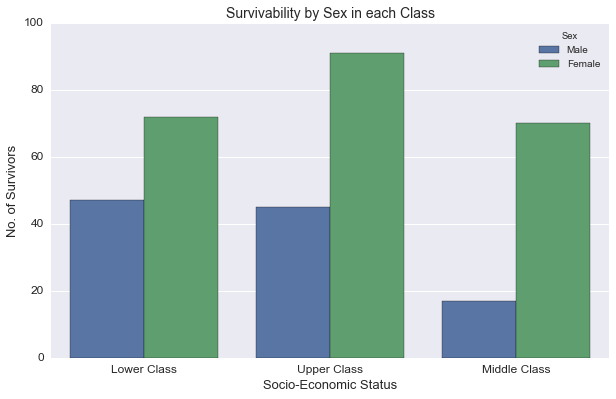

In [27]:
# Looking into survivability by Class
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df, estimator=np.sum, ci=0)

# Plot Customizations
plot_customize(ax, 'Survivability by Sex in each Class', 'Socio-Economic Status', 'No. of Survivors')
fig.savefig(fig_prefix+'survivability_by_sex_and_class')

> **Note:** Using the two graphs before, it is not surprising that for each of the class, the number of female survivors are greater than the male survivors; and that the Upper Class had higher survivability compared to the other two classes.

### Survivability by Age

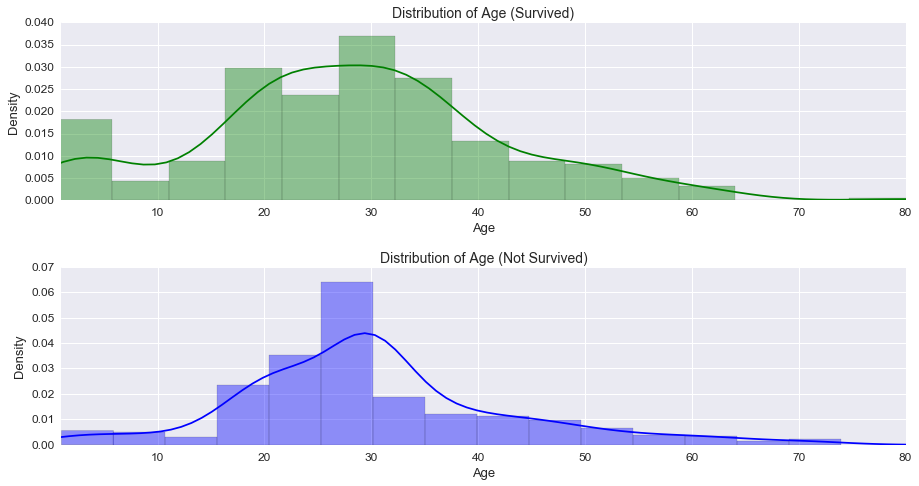

In [28]:
# Looking into the survivability distrubition by age
fig = plt.figure(figsize=(13,7))

# Plotting the distribution
# For Survived
ax1 = fig.add_subplot(211)
ax1= sns.distplot(titanic_df[titanic_df['Survived']==1]['Filled Age'], label="Survived", color='g', bins=15)
plot_customize(ax1, 'Distribution of Age (Survived)', 'Age', 'Density')
ax1.set(xlim=(1,titanic_df['Filled Age'].max()))

# For Not Survived
ax2 = fig.add_subplot(212)
ax2 = sns.distplot(titanic_df[titanic_df['Survived']==0]['Filled Age'], label="Not Survived", color='b', bins=15)
plot_customize(ax2, 'Distribution of Age (Not Survived)', 'Age', 'Density')
ax2.set(xlim=(1,titanic_df['Filled Age'].max()))

plt.tight_layout()

fig.savefig(fig_prefix+'survivability_by_age')

## Rejected Ideas

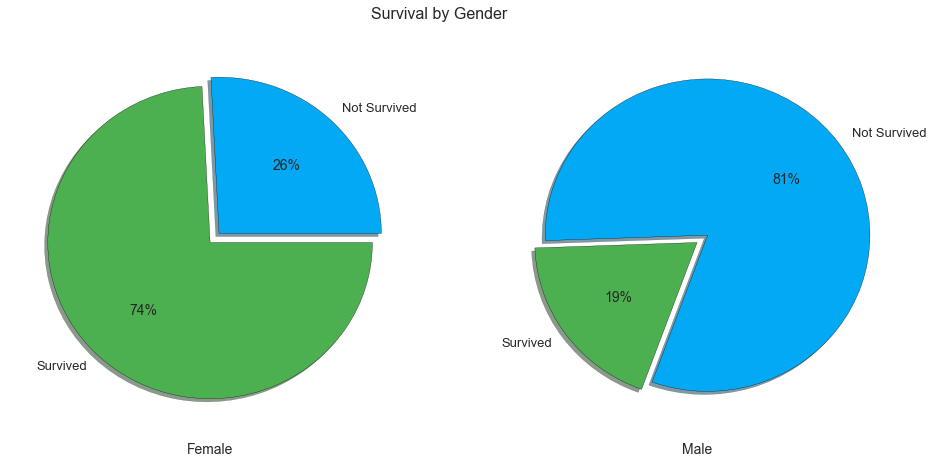

In [29]:
# NOT GONNA USE THIS
# Below is better
labels = ['Not Survived', 'Survived']
colors = ['#03A9F4', '#4CAF50']
explode = (0.08, 0)

fig = plt.figure(figsize=(16,7))
fig.suptitle('Survival by Gender', fontsize=16)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_xlabel('Female', fontsize=14)
patches, texts, autotexts = ax1.pie(grouped_by_sex_survival.ix['Female'], labels = labels, autopct='%.0f%%', 
        explode=explode, shadow=True, colors=colors)
texts[0].set_fontsize(13)
texts[1].set_fontsize(13)

ax2.set_xlabel('Male', fontsize=14)
patches, texts, autotexts = ax2.pie(grouped_by_sex_survival.ix['Male'], labels = labels, autopct='%.0f%%', 
        explode=explode, shadow=True, colors=colors, startangle=-110)
texts[0].set_fontsize(13)
texts[1].set_fontsize(13)

    Scratch: Thinking of just finding the median age by sex and putting the median age on the missing values. BUT! Why not try extracting the title of the name (i.e. Mr., Mrs, etc) and then find the median age based on the sex and the title.
    
    Steps:
    1. Split surname by using , as delimiter
    2. Create a list of titles from the data
    3. Unify these titles